<a href="https://colab.research.google.com/github/pramudithnk/test-repo/blob/master/plant_disease_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# My data is in google drive.
train_dir ="drive/My Drive/research/train_set"
test_dir="drive/My Drive/research/test_set"

In [0]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

In [0]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) 
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

15 Classes
27948 Train images
6986 Test images


In [0]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [0]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 27948 images belonging to 15 classes.
Found 6986 images belonging to 15 classes.


In [0]:
# The name of the 15 diseases.
train_generator.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Early_blight': 6,
 'Tomato___Late_blight': 7,
 'Tomato___Leaf_Mold': 8,
 'Tomato___Septoria_leaf_spot': 9,
 'Tomato___Spider_mites Two-spotted_spider_mite': 10,
 'Tomato___Target_Spot': 11,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 12,
 'Tomato___Tomato_mosaic_virus': 13,
 'Tomato___healthy': 14}

In [0]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 19, 64)        0         


In [0]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'flatten_1', 'dense_1', 'dropout_1', 'dense_2', 'dense_3']


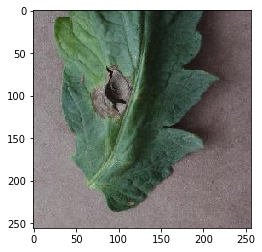

In [0]:
# Take one image to visualize it's changes after every layer
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/My Drive/research/train_set/Tomato___Early_blight/Tomato_Early_blight (141).JPG')
plt.imshow(img1);

In [0]:
#preprocess image
img1 = image.load_img('/content/drive/My Drive/research/train_set/Tomato___Early_blight/Tomato_Early_blight (7).JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [0]:
# Visualizing output after every layer.
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_3').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_3').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten_1').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

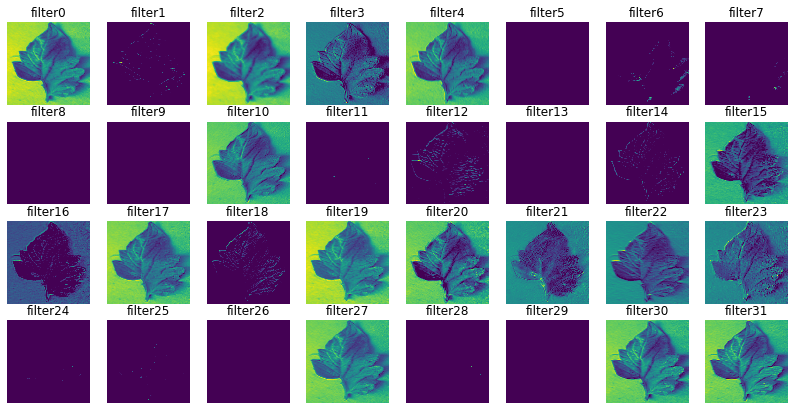

In [0]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

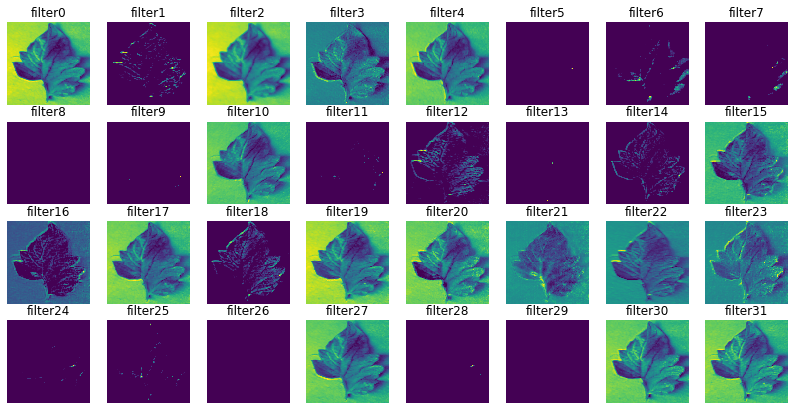

In [0]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

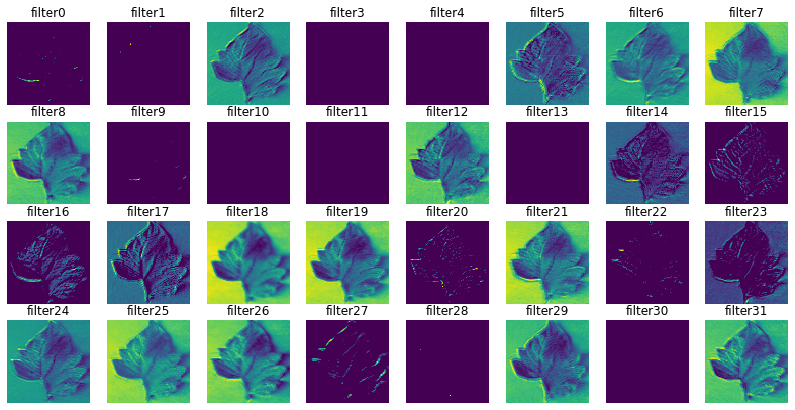

In [0]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

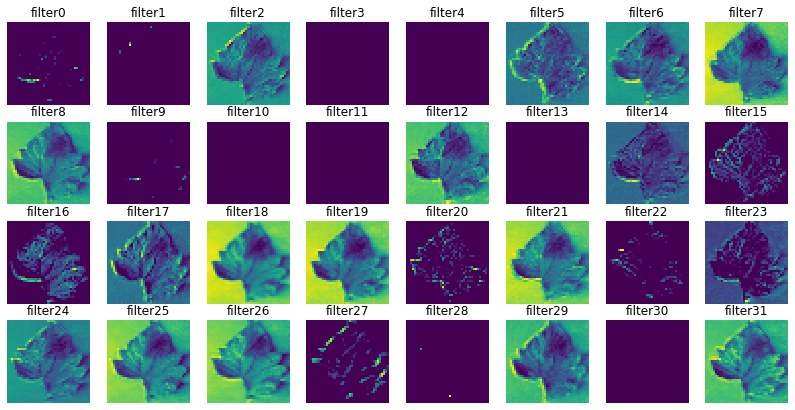

In [0]:
# we can also visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis') 
plt.show()

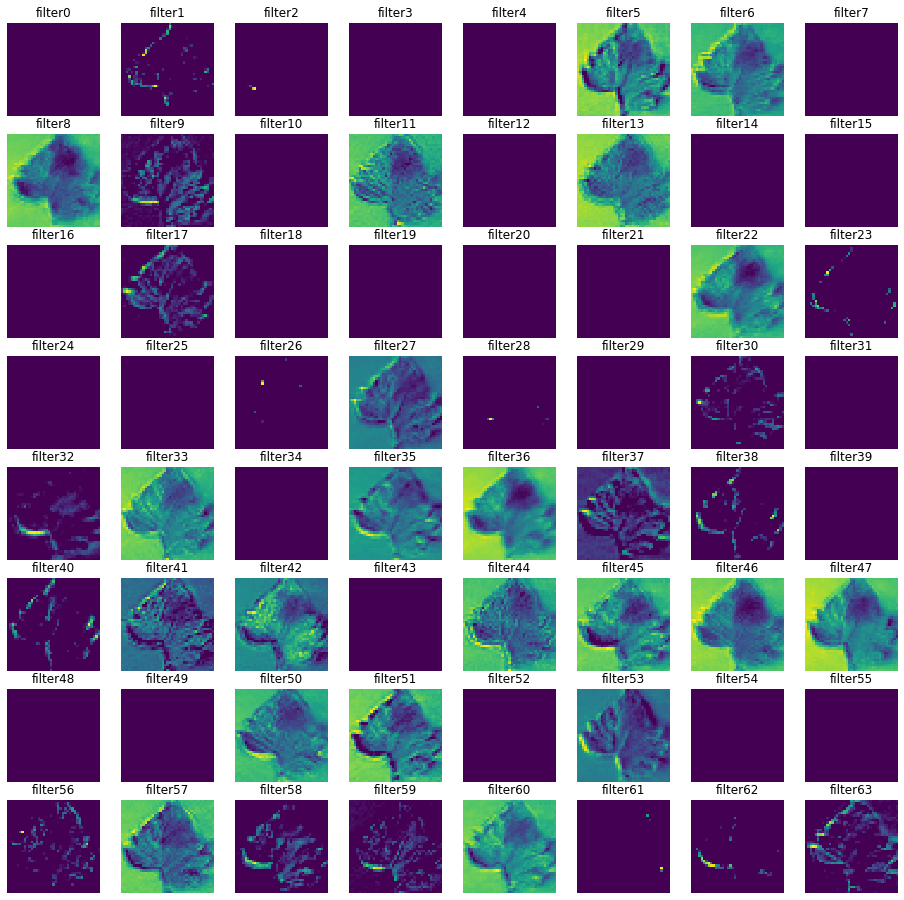

In [0]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

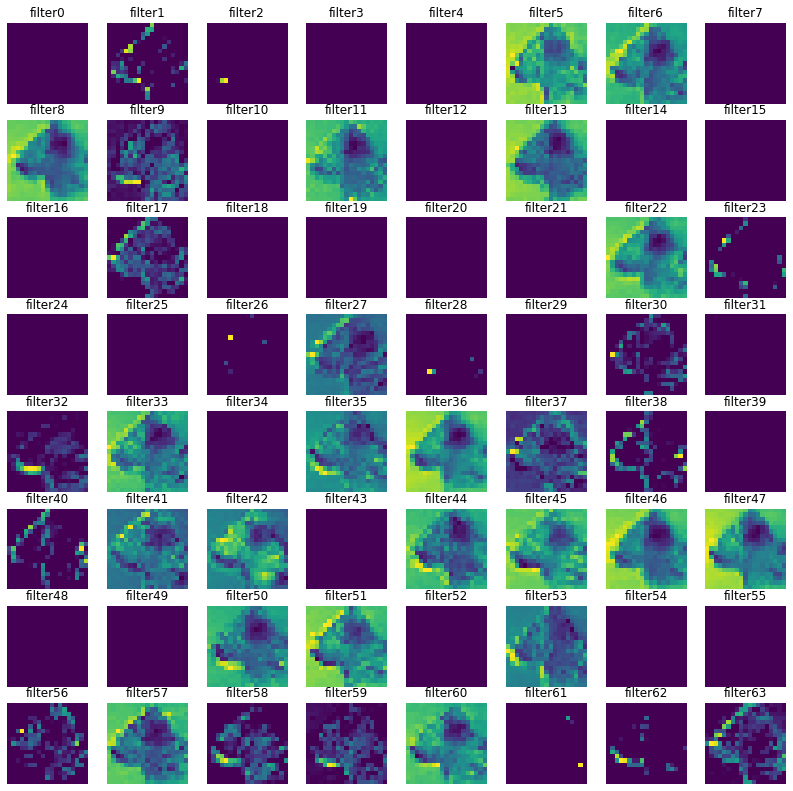

In [0]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i],cmap='viridis')
plt.show()

In [0]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 27948 images belonging to 15 classes.


In [70]:
# Model building to get trained with parameters.
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          nb_epoch=15,
                          steps_per_epoch=train_generator.samples// batch_size,
                          validation_data=validation_generator,
                          nb_val_samples= validation_generator.samples// batch_size,verbose=1)

Epoch 1/15
873/873 [==============================] - 10262s 12s/step - loss: 1.0818 - acc: 0.6406 - val_loss: 0.4974 - val_acc: 0.8303
Epoch 2/15
873/873 [==============================] - 820s 939ms/step - loss: 0.5037 - acc: 0.8306 - val_loss: 0.3438 - val_acc: 0.8800
Epoch 3/15
873/873 [==============================] - 807s 925ms/step - loss: 0.3720 - acc: 0.8738 - val_loss: 0.2735 - val_acc: 0.9050
Epoch 4/15
873/873 [==============================] - 813s 931ms/step - loss: 0.2959 - acc: 0.9011 - val_loss: 0.1755 - val_acc: 0.9417
Epoch 5/15
873/873 [==============================] - 822s 941ms/step - loss: 0.2491 - acc: 0.9160 - val_loss: 0.1731 - val_acc: 0.9416
Epoch 6/15
873/873 [==============================] - 814s 932ms/step - loss: 0.2215 - acc: 0.9259 - val_loss: 0.1201 - val_acc: 0.9618
Epoch 7/15
873/873 [==============================] - 813s 932ms/step - loss: 0.1894 - acc: 0.9361 - val_loss: 0.2863 - val_acc: 0.9006
Epoch 8/15
873/873 [============================

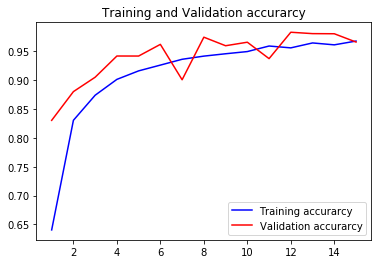

In [71]:
acc = train.history['acc']
val_acc = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()


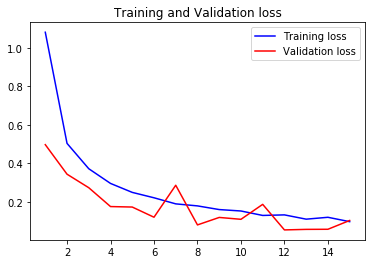

In [72]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [73]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

219/219 [==============================] - 2556s 12s/step
Test score is 0.16571819389571169
Test accuracy is 0.9488977955570543


In [0]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('crop.h5')

In [0]:
# Save model weights.
from keras.models import load_model
model.save_weights('crop_weights.h5')

In [76]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Early_blight': 6,
 'Tomato___Late_blight': 7,
 'Tomato___Leaf_Mold': 8,
 'Tomato___Septoria_leaf_spot': 9,
 'Tomato___Spider_mites Two-spotted_spider_mite': 10,
 'Tomato___Target_Spot': 11,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 12,
 'Tomato___Tomato_mosaic_virus': 13,
 'Tomato___healthy': 14}

In [0]:
# Loading model and predict.
from keras.models import load_model
model=load_model('crop.h5')

Classes = ["Pepper,_bell___Bacterial_spot","Pepper,_bell___healthy","Potato___Early_blight","Potato___Late_blight","Potato___healthy","Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_Yellow_Leaf_Curl_Virus","Tomato___Tomato_mosaic_virus","Tomato___healthy"]


Tomato___Septoria_leaf_spot


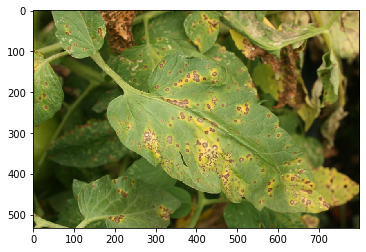

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/My Drive/research/test/test2.jpg')])
disease=image.load_img('/content/drive/My Drive/research/test/test2.jpg')
plt.imshow(disease)
print (Classes[int(result)])

Potato___Early_blight


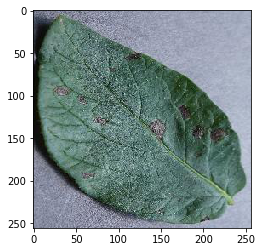

In [87]:
result = model.predict_classes([prepare('/content/drive/My Drive/research/test/test4.JPG')])
disease=image.load_img('/content/drive/My Drive/research/test/test4.JPG')
plt.imshow(disease)
print (Classes[int(result)])

Tomato___Tomato_mosaic_virus


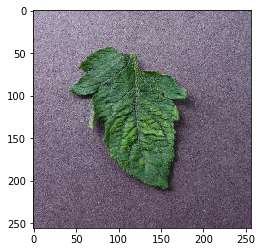

In [91]:
result = model.predict_classes([prepare('/content/drive/My Drive/research/test/test9.JPG')])
disease=image.load_img('/content/drive/My Drive/research/test/test9.JPG')
plt.imshow(disease)
print (Classes[int(result)])